In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import time

In [2]:
tf.get_logger().setLevel("ERROR")

## From Biological to Artificial Neurons

#### The Perceptron

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [4]:
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int32) # Iris setosa?

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

## Implementing MLPs with Keras

#### Building an Image Classifier Using the Sequential API

##### Using Keras to load the dataset

In [5]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

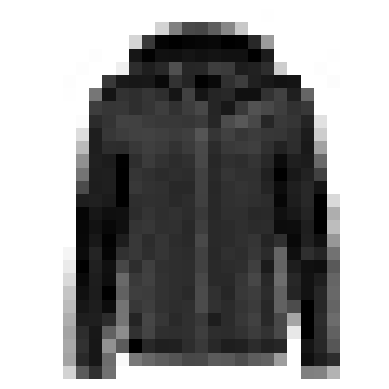

'Coat'

In [11]:
from matplotlib import pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()
class_names[y_train[0]]

##### Creating the model using the Sequential API

In [12]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
model.get_layer("dense") is hidden1

True

In [18]:
weights, biases = hidden1.get_weights()

In [19]:
weights.shape

(784, 300)

In [20]:
biases.shape

(300,)

##### Compiling the model

In [21]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

##### Training and evaluating the model

In [22]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7166 - accuracy: 0.7627 - val_loss: 0.5319 - val_accuracy: 0.8184
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4879 - accuracy: 0.8292 - val_loss: 0.4410 - val_accuracy: 0.8490
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4418 - accuracy: 0.8436 - val_loss: 0.5634 - val_accuracy: 0.7864
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4148 - accuracy: 0.8549 - val_loss: 0.3944 - val_accuracy: 0.8674
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3962 - accuracy: 0.8607 - val_loss: 0.3780 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3776 - accuracy: 0.8665 - val_loss: 0.3723 - val_accuracy: 0.8740
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3656 - accuracy: 0.8695 - val_loss: 0.3666 - val_accuracy:

In [23]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [24]:
len(history.epoch)

30

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

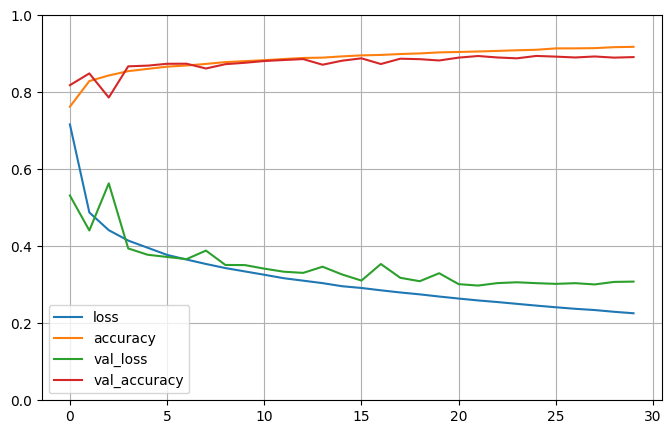

In [26]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 778us/step - loss: 0.3416 - accuracy: 0.8784


[0.34156355261802673, 0.8784000277519226]

##### Using the model to make predictions

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new, verbose=0)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.04, 0.  , 0.93],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [29]:
y_pred = np.argmax(model.predict(X_new, verbose=0), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [30]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [31]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

#### Building a Regression MLP Using the Sequential API

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [33]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 963us/step - loss: 2.2311 - val_loss: 1.9820
Epoch 2/20
363/363 [==============================] - 0s 768us/step - loss: 0.7855 - val_loss: 0.7990
Epoch 3/20
363/363 [==============================] - 0s 860us/step - loss: 0.6530 - val_loss: 0.6111
Epoch 4/20
363/363 [==============================] - 0s 775us/step - loss: 0.6062 - val_loss: 0.5740
Epoch 5/20
363/363 [==============================] - 0s 769us/step - loss: 0.5736 - val_loss: 0.5440
Epoch 6/20
363/363 [==============================] - 0s 807us/step - loss: 0.5472 - val_loss: 0.5222
Epoch 7/20
363/363 [==============================] - 0s 768us/step - loss: 0.5262 - val_loss: 0.4948
Epoch 8/20
363/363 [==============================] - 0s 817us/step - loss: 0.5090 - val_loss: 0.4862
Epoch 9/20
363/363 [==============================] - 0s 781us/step - loss: 0.4945 - val_loss: 0.4721
Epoch 10/20
363/363 [==============================] - 0s 841us/step - loss: 0.482

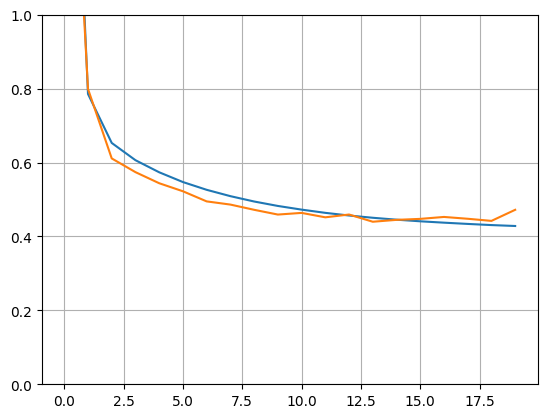

In [34]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 543us/step - loss: 0.4197


0.4196930229663849

In [36]:
X_new = X_test[:3]
y_pred = model.predict(X_new, verbose=0)
y_pred

array([[0.52453136],
       [1.7489448 ],
       [3.513623  ]], dtype=float32)

In [37]:
y_new = y_test[:3]
y_new

array([0.477  , 0.458  , 5.00001])

#### Building Complex Models Using the Functional API

In [38]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 30)                   930       ['dense_5[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_6[0][0]']         

In [40]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [41]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 dense_8 (Dense)             (None, 30)                   210       ['deep_input[0][0]']          
                                                                                                  
 wide_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 30)                   930       ['dense_8[0][0]']             
                                                                                            

In [42]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid));

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.9922 - val_loss: 1.0295
Epoch 2/20
363/363 [==============================] - 0s 855us/step - loss: 0.8145 - val_loss: 0.7511
Epoch 3/20
363/363 [==============================] - 0s 912us/step - loss: 0.7200 - val_loss: 0.7274
Epoch 4/20
363/363 [==============================] - 0s 906us/step - loss: 0.6809 - val_loss: 0.6654
Epoch 5/20
363/363 [==============================] - 0s 901us/step - loss: 0.6551 - val_loss: 0.6272
Epoch 6/20
363/363 [==============================] - 0s 874us/step - loss: 0.6320 - val_loss: 0.6205
Epoch 7/20
363/363 [==============================] - 0s 906us/step - loss: 0.6123 - val_loss: 0.6222
Epoch 8/20
363/363 [==============================] - 0s 875us/step - loss: 0.5932 - val_loss: 0.5695
Epoch 9/20
363/363 [==============================] - 0s 927us/step - loss: 0.5746 - val_loss: 0.5549
Epoch 10/20
363/363 [==============================] - 0s 958us/step - loss: 0.5579 

In [43]:
model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 560us/step - loss: 0.4590


0.4590250253677368

In [44]:
y_pred = model.predict((X_new_A, X_new_B), verbose=0)
y_pred

array([[0.45941347],
       [1.6174605 ],
       [3.350224  ]], dtype=float32)

In [45]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, 
          validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]));

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.6121 - main_output_loss: 2.2488 - aux_output_loss: 5.8823 - val_loss: 2.2468 - val_main_output_loss: 1.9547 - val_aux_output_loss: 4.8752
Epoch 2/20
363/363 [==============================] - 0s 960us/step - loss: 1.0991 - main_output_loss: 0.7693 - aux_output_loss: 4.0681 - val_loss: 0.9883 - val_main_output_loss: 0.7457 - val_aux_output_loss: 3.1714
Epoch 3/20
363/363 [==============================] - 0s 965us/step - loss: 0.8619 - main_output_loss: 0.6550 - aux_output_loss: 2.7239 - val_loss: 0.7877 - val_main_output_loss: 0.6030 - val_aux_output_loss: 2.4504
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7511 - main_output_loss: 0.6111 - aux_output_loss: 2.0110 - val_loss: 0.7331 - val_main_output_loss: 0.5736 - val_aux_output_loss: 2.1689
Epoch 5/20
363/363 [==============================] - 0s 972us/step - loss: 0.6904 - main_output_loss: 0.5819 - aux_output_loss: 1.6660 - va

In [46]:
model.evaluate([X_test_A, X_test_B], [y_test, y_test]) # total_loss, main_loss, aux_loss

162/162 [==============================] - 0s 692us/step - loss: 0.4929 - main_output_loss: 0.4317 - aux_output_loss: 1.0431


[0.49287813901901245, 0.4317425489425659, 1.0430991649627686]

In [47]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B), verbose=0)
y_pred_main, y_pred_aux

(array([[0.40985888],
        [1.9966998 ],
        [3.1292746 ]], dtype=float32),
 array([[1.482746 ],
        [1.9556766],
        [2.7036757]], dtype=float32))

#### Using the Subclassing API to Build Dynamic Models

In [48]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs, training=None, mask=None):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [49]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=20, 
          validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)));

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.8865 - output_1_loss: 2.7593 - output_2_loss: 4.0317 - val_loss: 4.2122 - val_output_1_loss: 4.0011 - val_output_2_loss: 6.1119
Epoch 2/20
363/363 [==============================] - 0s 923us/step - loss: 1.1477 - output_1_loss: 0.9879 - output_2_loss: 2.5856 - val_loss: 1.5541 - val_output_1_loss: 1.2478 - val_output_2_loss: 4.3103
Epoch 3/20
363/363 [==============================] - 0s 954us/step - loss: 0.9065 - output_1_loss: 0.7881 - output_2_loss: 1.9727 - val_loss: 0.9884 - val_output_1_loss: 0.7272 - val_output_2_loss: 3.3392
Epoch 4/20
363/363 [==============================] - 0s 966us/step - loss: 0.8227 - output_1_loss: 0.7264 - output_2_loss: 1.6889 - val_loss: 0.9229 - val_output_1_loss: 0.6828 - val_output_2_loss: 3.0845
Epoch 5/20
363/363 [==============================] - 0s 978us/step - loss: 0.7768 - output_1_loss: 0.6913 - output_2_loss: 1.5466 - val_loss: 0.8687 - val_output_1_loss: 0.6558 

In [50]:
model.evaluate((X_test_A, X_test_B), (y_test, y_test)) # total_loss, main_loss, aux_loss

162/162 [==============================] - 0s 663us/step - loss: 0.5199 - output_1_loss: 0.4580 - output_2_loss: 1.0769


[0.5198745727539062, 0.45798084139823914, 1.0769187211990356]

In [51]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B), verbose=0)
y_pred_main, y_pred_aux

(array([[0.54179376],
        [1.8892593 ],
        [2.9359946 ]], dtype=float32),
 array([[1.2608975],
        [1.9434103],
        [2.5832918]], dtype=float32))

#### Saving and Restoring a Model

In [52]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [53]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid));

Epoch 1/10
363/363 [==============================] - 1s 974us/step - loss: 1.6338 - val_loss: 1.0353
Epoch 2/10
363/363 [==============================] - 0s 818us/step - loss: 0.7623 - val_loss: 0.8091
Epoch 3/10
363/363 [==============================] - 0s 880us/step - loss: 0.6937 - val_loss: 0.6988
Epoch 4/10
363/363 [==============================] - 0s 856us/step - loss: 0.6501 - val_loss: 0.6117
Epoch 5/10
363/363 [==============================] - 0s 825us/step - loss: 0.6164 - val_loss: 0.5747
Epoch 6/10
363/363 [==============================] - 0s 869us/step - loss: 0.5864 - val_loss: 0.5514
Epoch 7/10
363/363 [==============================] - 0s 866us/step - loss: 0.5607 - val_loss: 0.5265
Epoch 8/10
363/363 [==============================] - 0s 942us/step - loss: 0.5376 - val_loss: 0.5127
Epoch 9/10
363/363 [==============================] - 0s 872us/step - loss: 0.5172 - val_loss: 0.4970
Epoch 10/10
363/363 [==============================] - 0s 870us/step - loss: 0.498

In [54]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 572us/step - loss: 0.4834


0.48340171575546265

In [55]:
y_pred = model.predict(X_new, verbose=0)
y_pred

array([[0.87849784],
       [1.2728844 ],
       [3.0125496 ]], dtype=float32)

In [56]:
model.save("temp_model.keras")
model = keras.models.load_model("temp_model.keras")

In [57]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 630us/step - loss: 0.4834


0.48340171575546265

In [58]:
y_pred = model.predict(X_new, verbose=0)
y_pred

array([[0.87849784],
       [1.2728844 ],
       [3.0125496 ]], dtype=float32)

#### Using Callbacks

In [59]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [60]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("temp_model.keras", save_best_only=True)

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), 
          callbacks=[checkpoint_cb]);

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.5571 - val_loss: 1.0978
Epoch 2/10
363/363 [==============================] - 0s 864us/step - loss: 0.8161 - val_loss: 0.6739
Epoch 3/10
363/363 [==============================] - 0s 904us/step - loss: 0.6637 - val_loss: 0.6394
Epoch 4/10
363/363 [==============================] - 0s 867us/step - loss: 0.6068 - val_loss: 0.5617
Epoch 5/10
363/363 [==============================] - 0s 871us/step - loss: 0.5708 - val_loss: 0.5227
Epoch 6/10
363/363 [==============================] - 0s 871us/step - loss: 0.5388 - val_loss: 0.5068
Epoch 7/10
363/363 [==============================] - 0s 899us/step - loss: 0.5149 - val_loss: 0.5040
Epoch 8/10
363/363 [==============================] - 0s 859us/step - loss: 0.4935 - val_loss: 0.4590
Epoch 9/10
363/363 [==============================] - 0s 878us/step - loss: 0.4748 - val_loss: 0.4494
Epoch 10/10
363/363 [==============================] - 0s 846us/step - loss: 0.4595 

In [61]:
model = keras.models.load_model("temp_model.keras") # rollback to best model

In [62]:
model.evaluate(X_valid, y_valid)

121/121 [==============================] - 0s 570us/step - loss: 0.4494


0.4494338631629944

In [63]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
          callbacks=[checkpoint_cb, early_stopping_cb]);

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4598 - val_loss: 0.4335
Epoch 2/100
363/363 [==============================] - 0s 836us/step - loss: 0.4471 - val_loss: 0.4319
Epoch 3/100
363/363 [==============================] - 0s 889us/step - loss: 0.4365 - val_loss: 0.4110
Epoch 4/100
363/363 [==============================] - 0s 847us/step - loss: 0.4266 - val_loss: 0.4035
Epoch 5/100
363/363 [==============================] - 0s 848us/step - loss: 0.4195 - val_loss: 0.3935
Epoch 6/100
363/363 [==============================] - 0s 868us/step - loss: 0.4125 - val_loss: 0.3869
Epoch 7/100
363/363 [==============================] - 0s 857us/step - loss: 0.4072 - val_loss: 0.3865
Epoch 8/100
363/363 [==============================] - 0s 851us/step - loss: 0.4026 - val_loss: 0.3783
Epoch 9/100
363/363 [==============================] - 0s 912us/step - loss: 0.3986 - val_loss: 0.3740
Epoch 10/100
363/363 [==============================] - 0s 838us/step - los

In [64]:
model.evaluate(X_valid, y_valid)

121/121 [==============================] - 0s 549us/step - loss: 0.3411


0.34108030796051025

In [65]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("val/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
        
val_train_ratio_cb = PrintValTrainRatioCallback()

In [66]:
model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid), 
          callbacks=[val_train_ratio_cb], verbose=2);

Epoch 1/3
val/train: 0.97
363/363 - 0s - loss: 0.3248 - val_loss: 0.3140 - 287ms/epoch - 791us/step
Epoch 2/3
val/train: 1.18
363/363 - 0s - loss: 0.3241 - val_loss: 0.3820 - 279ms/epoch - 770us/step
Epoch 3/3
val/train: 0.95
363/363 - 0s - loss: 0.3244 - val_loss: 0.3096 - 264ms/epoch - 728us/step


#### Using TensorBoard for Visualization

In [67]:
def get_run_logdir():
    root_logdir = os.path.join(os.curdir, "logs")
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\logs\\run_2024_03_11-04_42_19'

In [68]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [69]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), 
          callbacks=[checkpoint_cb, tensorboard_cb]);

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 2.0434 - val_loss: 1.0789
Epoch 2/30
363/363 [==============================] - 0s 938us/step - loss: 0.8035 - val_loss: 0.7242
Epoch 3/30
363/363 [==============================] - 0s 909us/step - loss: 0.6826 - val_loss: 0.6329
Epoch 4/30
363/363 [==============================] - 0s 913us/step - loss: 0.6269 - val_loss: 0.5877
Epoch 5/30
363/363 [==============================] - 0s 930us/step - loss: 0.5864 - val_loss: 0.5465
Epoch 6/30
363/363 [==============================] - 0s 892us/step - loss: 0.5504 - val_loss: 0.5183
Epoch 7/30
363/363 [==============================] - 0s 968us/step - loss: 0.5227 - val_loss: 0.4835
Epoch 8/30
363/363 [==============================] - 0s 947us/step - loss: 0.4997 - val_loss: 0.4867
Epoch 9/30
363/363 [==============================] - 0s 929us/step - loss: 0.4805 - val_loss: 0.4579
Epoch 10/30
363/363 [==============================] - 0s 960us/step - loss: 0.4656 

In [70]:
%load_ext tensorboard
%tensorboard --logdir=./logs --port=6006

Reusing TensorBoard on port 6006 (pid 58936), started 0:03:09 ago. (Use '!kill 58936' to kill it.)

In [71]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\logs\\run_2024_03_11-04_42_30'

In [72]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [73]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-2))
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), 
          callbacks=[checkpoint_cb, tensorboard_cb]);

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.7871 - val_loss: 2.0522
Epoch 2/30
363/363 [==============================] - 0s 947us/step - loss: 0.5080 - val_loss: 10.2459
Epoch 3/30
363/363 [==============================] - 0s 953us/step - loss: 0.5562 - val_loss: 0.7214
Epoch 4/30
363/363 [==============================] - 0s 869us/step - loss: 0.3964 - val_loss: 0.6322
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3856 - val_loss: 1.3626
Epoch 6/30
363/363 [==============================] - 0s 906us/step - loss: 0.3791 - val_loss: 1.6794
Epoch 7/30
363/363 [==============================] - 0s 923us/step - loss: 0.3784 - val_loss: 0.3935
Epoch 8/30
363/363 [==============================] - 0s 945us/step - loss: 0.3593 - val_loss: 0.3411
Epoch 9/30
363/363 [==============================] - 0s 945us/step - loss: 0.3518 - val_loss: 0.3432
Epoch 10/30
363/363 [==============================] - 0s 941us/step - loss: 0.3475 -

## Fine-Tuning Neural Network Hyperparameters

In [74]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=None):
    if input_shape is None:
        input_shape = [8]
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [75]:
from scikeras.wrappers import KerasRegressor

keras_reg = KerasRegressor(build_model, n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=None,
                           callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [76]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid));

Epoch 1/100
363/363 [==============================] - 0s 938us/step - loss: 1.2310 - val_loss: 5.6965
Epoch 2/100
363/363 [==============================] - 0s 769us/step - loss: 0.7128 - val_loss: 15.1097
Epoch 3/100
363/363 [==============================] - 0s 766us/step - loss: 0.7669 - val_loss: 20.7387
Epoch 4/100
363/363 [==============================] - 0s 823us/step - loss: 0.6478 - val_loss: 4.5443
Epoch 5/100
363/363 [==============================] - 0s 780us/step - loss: 0.5204 - val_loss: 0.6678
Epoch 6/100
363/363 [==============================] - 0s 762us/step - loss: 0.4745 - val_loss: 0.4539
Epoch 7/100
363/363 [==============================] - 0s 809us/step - loss: 0.4568 - val_loss: 0.4221
Epoch 8/100
363/363 [==============================] - 0s 775us/step - loss: 0.4457 - val_loss: 0.4103
Epoch 9/100
363/363 [==============================] - 0s 784us/step - loss: 0.4354 - val_loss: 0.4057
Epoch 10/100
363/363 [==============================] - 0s 780us/step -

In [77]:
keras_reg.score(X_test, y_test) # R^2 value

162/162 [==============================] - 0s 494us/step


0.7276024527721163

In [78]:
y_pred = keras_reg.predict(X_new, verbose=0)
y_pred

array([0.64081264, 1.6595542 , 3.776435  ], dtype=float32)

In [79]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

keras_reg.verbose = 0
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid));

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END learning_rate=0.0016834549246003507, n_hidden=0, n_neurons=15; total time=  10.3s
[CV] END learning_rate=0.0016834549246003507, n_hidden=0, n_neurons=15; total time=   2.9s
[CV] END learning_rate=0.0016834549246003507, n_hidden=0, n_neurons=15; total time=   7.0s
[CV] END learning_rate=0.008731907739399207, n_hidden=0, n_neurons=21; total time=   2.2s
[CV] END learning_rate=0.008731907739399207, n_hidden=0, n_neurons=21; total time=   5.9s
[CV] END learning_rate=0.008731907739399207, n_hidden=0, n_neurons=21; total time=   2.3s
[CV] END learning_rate=0.0006154014789262349, n_hidden=2, n_neurons=87; total time=  21.8s
[CV] END learning_rate=0.0006154014789262349, n_hidden=2, n_neurons=87; total time=   5.6s
[CV] END learning_rate=0.0006154014789262349, n_hidden=2, n_neurons=87; total time=  16.9s
[CV] END learning_rate=0.00039200217714159834, n_hidden=3, n_neurons=24; total time=  20.1s
[CV] END learning_rate=0.000392

In [80]:
rnd_search_cv.best_params_

{'learning_rate': 0.003362564125268811, 'n_hidden': 2, 'n_neurons': 42}

In [81]:
rnd_search_cv.best_score_ # R^2 value

0.7296736038446254

In [82]:
rnd_search_cv.best_estimator_

KerasRegressor(
	model=<function build_model at 0x0000026470FC7310>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=[<keras.src.callbacks.EarlyStopping object at 0x00000264744889A0>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	n_hidden=2
	n_neurons=42
	learning_rate=0.003362564125268811
	input_shape=None
)

In [83]:
rnd_search_cv.score(X_test, y_test) # R^2 value

0.7741362701613944

In [84]:
rnd_search_cv.predict(X_new)

array([0.3964597, 1.2399356, 4.593392 ], dtype=float32)